## Sentiment Classification
* Using amazon data reviews to classify wether the comment is positive, negative or nutral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
class Sentiment:
    NEGATIVE= "NEGATIVE"
    NEUTRAL= "NEUTRAL"
    POSITIVE= "POSITIVE"

class Review:
    def __init__(self, text, overall):
        self.text = text
        self.overall = overall
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.overall >=4:
            return Sentiment.POSITIVE
        elif self.overall == 3:
            return Sentiment.NEGATIVE
        else:
            return Sentiment.NEUTRAL
    
        

#### lOAD DATA FROM FILES
* The data is in json format in the files that are in the files directory

In [3]:
import json

reviews = []

with open("files/Books_small_10000.json") as reader:
    for line in reader:
        review = json.loads(line)
        reviews.append(Review(review["reviewText"], review["overall"] ))

reviews[0].sentiment

'POSITIVE'

#### DATA PREPARATION

In [5]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(reviews, test_size=0.25, random_state=33)

In [6]:
X_train = [i.text for i in train]
y_train = [i.sentiment for i in train]

X_test = [i.text for i in test]
y_test = [i.sentiment for i in test]

In [7]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

7500 7500 2500 2500


In [8]:
neg_count_train = len(list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, train )))
neg_count_test = len(list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, test )))


"""
NEG has the lowest freq
We want to balance the train and test data for N, P and N
"""

pos_train = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, train))[:neg_count_train]
neg_train = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, train))[:neg_count_train]

pos_test = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, test))[:neg_count_test]
neg_test = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, test))[:neg_count_test]

In [9]:
print(len(neg_test), len(pos_test), len(neg_train), len(pos_train))

254 254 724 724


In [10]:
"""
Train data should change to neg + pos + neu AND SHOULD BE SHUFFLED
"""

'\nTrain data should change to neg + pos + neu AND SHOULD BE SHUFFLED\n'

In [11]:
from random import shuffle
train = pos_train + neg_train
shuffle(train)
test = pos_test + neg_test
shuffle(test)

train[:2]

[<__main__.Review at 0x1c533b98100>, <__main__.Review at 0x1c533b0b880>]

In [12]:
X_train = [i.text for i in train]
y_train = [i.sentiment for i in train]

X_test = [i.text for i in test]
y_test = [i.sentiment for i in test]

#### BAG OF WORD VECTORISATION
* We are going to use the `CountVectorizer` from `feature_extraction.text`
* Convert a collection of text documents to a matrix of token counts
* [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
# WE DON'T WANT TO FIT A NEW MODEL FOR THE TEST DATA SET SO THAT'S WHY WE JUST TRANSFORM IT FROM THE FTTED MODEL
X_test_vectors = vectorizer.transform(X_test)


In [14]:
print(X_train[0])
print(X_train_vectors[0].toarray().shape)

Upon beginning this book, there were a few things that popped into my head: Mr. Spector has an interesting sense of humor, he doesn't back down in his writing, and his storytelling reminds me of my Papa. Grandpapa, my mother's father, is a great storyteller and even though sometimes his humor goes over my head, his enthusiasm and style always made listening that much more enjoyable. Mr. Spector is the same type of storyteller.As a memoir, or an attempt at one, I would have liked more organization. Centering it on one aspect of his life (like the traveling or his military career), I think, would have made the book more enjoyable. That said, his writing isn't bad and I could see everything he described. Granted, some of the stories (mainly in the middle) lacked in spirit. However, that doesn't make him a bad writer or his stories any less important.I loved that he decided to make a memoir for himself and his family. I wouldn't have been able to do this for fear that no one would care, bu

### CASSIFICATION
* Now we have our `train_x` and `train_y` we can fit them to a model and do some classification

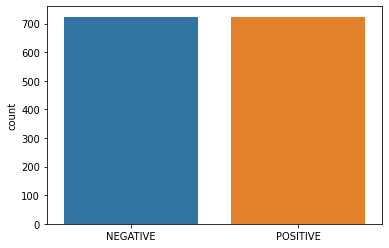

In [15]:
sns.countplot(x=y_train)
plt.show()

> From the visualisation we can see that the data is more skeweed to positive sentiments. **Let's fix that**

##### 1. SVC
* **Support Vector Classification.**
> [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [43]:
from sklearn.svm import SVC
clf_svm = SVC(kernel="linear", C=1)
clf_svm.fit(X_train_vectors, y_train)

SVC(C=1, kernel='linear')

In [44]:
X_test[9]

"I really enjoyed this book, it was fun, funny and well written. I'm looking forward to the next Quincy Mac adventure."

In [45]:
clf_svm.predict(X_test_vectors[9])

array(['POSITIVE'], dtype='<U8')

##### 2. Decision Tree
* Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
> [Docs](https://scikit-learn.org/stable/modules/tree.html)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(X_train_vectors, y_train)

DecisionTreeClassifier()

In [47]:
clf_dec.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

##### 3. Naive Bayes
> [Docs](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [48]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_vectors.toarray(), y_train)

GaussianNB()

In [49]:
clf_dec.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

#### 4. Logistic Regression
> [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [50]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(X_train_vectors, y_train)

LogisticRegression()

In [51]:
clf_dec.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

## Evaluation

In [52]:
print(clf_svm.score(X_test_vectors, y_test))
print(clf_dec.score(X_test_vectors, y_test))
#print(clf_gnb.score(X_test_vectors, y_test))
print(clf_log.score(X_test_vectors, y_test))

0.7795275590551181
0.6161417322834646
0.781496062992126


In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_svm.predict(X_test_vectors), 
         average=None, labels=[Sentiment.POSITIVE,  Sentiment.NEGATIVE])

array([0.7704918 , 0.78787879])

> With the f1_score, the array values should not be far apart that much

In [56]:
sents = vectorizer.transform(["bad."])
clf_log.predict(sents)

array(['NEGATIVE'], dtype='<U8')

> The modeel is sometimes predicting wrongly. The best way to improve this is to increase the **training data set.**.

In [42]:
### Tuning the model Grid
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': list(i+1 for i in range(19))}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train_vectors, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19],
                         'kernel': ('linear', 'rbf')})

### Saving our model

In [58]:
import pickle
with open('./models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)
    
print("MODEL SAVED")

MODEL SAVED


### Using our model Again

In [64]:
with open('models/sentiment_classifier.pkl', 'rb') as f:
    model = pickle.load(f)

model.predict(vectorizer.transform(["bad"]))[0]

'NEGATIVE'